In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from kmodes.kmodes import KModes
from openpyxl import Workbook

In [2]:
#Initialise repositories
_projroot = os.path.abspath('.')
_datadir = os.path.join(_projroot, 'data')
_preprocesseddir = os.path.join(_datadir, 'preprocesseddata')
_experimentdir = os.path.join(_datadir, 'experiments')
_rawdir = os.path.join(_datadir, 'rawdata')
_src = os.path.join(_projroot,'src')
_sampling = os.path.join(_experimentdir,'sampling')
_geodata = os.path.join(_datadir,'geodata')

In [3]:
df_places = gpd.read_file(os.path.join(_geodata, 'Output_Areas.geojson'))

In [4]:
Ofcom = pd.read_csv(os.path.join(_preprocesseddir,'Ofcom_Combine.csv'))
Ofcom['Postcode'].astype(str)
print(Ofcom)

      Unnamed: 0 Postcode PC_Area  Target  Population aged 65+  \
0              0   NW14HB      NW       0                    4   
1              1   NW14LJ      NW       0                    7   
2              2   NW14NR      NW       1                    0   
3              3   NW14NT      NW       1                    0   
4              4   NW14NX      NW       1                    0   
...          ...      ...     ...     ...                  ...   
7850        7850  WC2R1BF      WC       0                    0   
7851        7851  WC2R3AA      WC       0                    0   
7852        7852  WC2R3AT      WC       0                    1   
7853        7853  WC2R3JE      WC       0                    0   
7854        7854  SW1X9HF      SW       1                    3   

      Females aged 65-69  Females aged 65+  Females aged 70-74  \
0                      0                 3                   1   
1                      1                 4                   1   
2        

In [5]:
Postcode_OA = pd.read_csv(os.path.join(_geodata,'postcode_OA.csv'))
Postcode_OA['Postcode'].astype(str)

0        NW13AU
1        NW14HB
2        NW14LJ
3        NW14LL
4        NW14NR
         ...   
7850    WC2R3DX
7851    WC2R3JE
7852    WC2R3JJ
7853    WC2R3LD
7854    WC2R3LL
Name: Postcode, Length: 7855, dtype: object

In [6]:
Ofcom = Ofcom.merge(Postcode_OA, on=['Postcode'], how = 'outer')

In [7]:
Ofcom = Ofcom.drop(['Unnamed: 0_x','Unnamed: 0_y', 'Postcode', 'PC_Area'], axis =1)

print(Ofcom)

      Target  Population aged 65+  Females aged 65-69  Females aged 65+  \
0          0                    4                   0                 3   
1          0                    7                   1                 4   
2          1                    0                   0                 0   
3          1                    0                   0                 0   
4          1                    0                   0                 0   
...      ...                  ...                 ...               ...   
7850       0                    0                   0                 0   
7851       0                    0                   0                 0   
7852       0                    1                   1                 1   
7853       0                    0                   0                 0   
7854       1                    3                   1                 3   

      Females aged 70-74  Females aged 75-79  Females aged 80-84  \
0                      1       

In [8]:
cont = list(set(list(Ofcom.select_dtypes(exclude=['object']).columns))-set(['Target']))
maxi = Ofcom[cont].max()
print(maxi)
Ofcom_norm = Ofcom
Ofcom_norm[cont] = Ofcom[cont]/maxi
print(Ofcom)
        

Females aged 85-89            6.0000
Females aged under 25        52.0000
Males aged 45-65             41.0000
Females aged 100+             1.0000
Males aged 85-89             13.0000
Females aged 65+             40.0000
Females aged 45-65           40.0000
Males aged 80-84              6.0000
Males aged 25-44             88.0000
Population aged 65+          72.0000
Males aged 90-94              9.0000
Males aged 95-99              3.0000
Females aged 75-79            9.0000
Females aged 90-94            3.0000
Males aged 70-74              9.0000
Females aged 70-74           12.0000
Median Income             85000.0000
Males aged 65+               32.0000
Females aged 25-44           80.0000
Males aged 65-69              8.0000
Females aged 65-69           14.0000
Males aged 75-79              8.0000
Males aged under 25          55.0000
Mode Income              110000.0000
Lower Quartile            58780.4878
Females aged 80-84            7.0000
Females aged 95_99            2.0000
M

In [9]:
km = KModes(n_clusters=5, init='Huang', n_init=10, verbose=1)

clusters = km.fit_predict(Ofcom_norm)

# Print the cluster centroids
print(clusters)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2707, cost: 89403.0
Run 1, iteration: 2/100, moves: 702, cost: 89189.0
Run 1, iteration: 3/100, moves: 47, cost: 89189.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2420, cost: 90973.0
Run 2, iteration: 2/100, moves: 766, cost: 90321.0
Run 2, iteration: 3/100, moves: 603, cost: 90284.0
Run 2, iteration: 4/100, moves: 108, cost: 90245.0
Run 2, iteration: 5/100, moves: 18, cost: 90245.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3519, cost: 90052.0
Run 3, iteration: 2/100, moves: 1078, cost: 90040.0
Run 3, iteration: 3/100, moves: 7, cost: 90040.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2834, cost: 90332.0
Run 4, iteration: 2/100, moves: 923, cost: 89766.0
Run 4, iteration

In [10]:
Clusters = pd.DataFrame((clusters), columns = ['Clusters'])
Clusters['OA11CD'] = Ofcom['OA11CD']

In [11]:
DigEx = Clusters.groupby('OA11CD').mean()

In [12]:
df_places = df_places.merge(DigEx, on = ['OA11CD'], how = 'outer')
df_places[['Clusters']] = df_places[['Clusters']].fillna(value = 0)

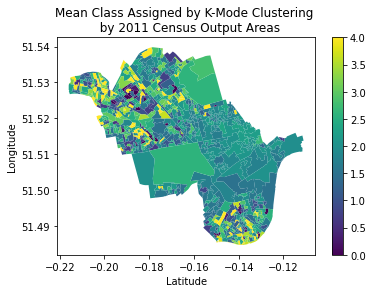

In [13]:
df_places.plot(column = 'Clusters', legend = True)
plt.title('Mean Class Assigned by K-Mode Clustering \n  by 2011 Census Output Areas')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.savefig('Ofcom_Exclusion_loc.png', dpi = 600)

In [14]:
centroids = pd.DataFrame(km.cluster_centroids_, columns = Ofcom.columns)
centroids[cont] = centroids[cont].apply(pd.to_numeric)
print(Ofcom[cont].max())
centroids[cont] = centroids[cont].mul(maxi, axis = 1)
print(centroids)

Females aged 85-89       1.0
Females aged under 25    1.0
Males aged 45-65         1.0
Females aged 100+        1.0
Males aged 85-89         1.0
Females aged 65+         1.0
Females aged 45-65       1.0
Males aged 80-84         1.0
Males aged 25-44         1.0
Population aged 65+      1.0
Males aged 90-94         1.0
Males aged 95-99         1.0
Females aged 75-79       1.0
Females aged 90-94       1.0
Males aged 70-74         1.0
Females aged 70-74       1.0
Median Income            1.0
Males aged 65+           1.0
Females aged 25-44       1.0
Males aged 65-69         1.0
Females aged 65-69       1.0
Males aged 75-79         1.0
Males aged under 25      1.0
Mode Income              1.0
Lower Quartile           1.0
Females aged 80-84       1.0
Females aged 95_99       1.0
Males aged 100+          1.0
Mean Income              1.0
dtype: float64
  Target  Population aged 65+  Females aged 65-69  Females aged 65+  \
0      0                  4.0                 1.0               2.0   
1 

In [15]:
Ofcom_Cluster = Ofcom
Ofcom_Cluster['Clusters'] = clusters
Ofcom_Cluster[cont] = Ofcom_Cluster[cont].apply(pd.to_numeric)
print(Ofcom[cont].max())
Ofcom_Cluster[cont] = Ofcom_Cluster[cont].mul(maxi, axis = 1)

Females aged 85-89       1.0
Females aged under 25    1.0
Males aged 45-65         1.0
Females aged 100+        1.0
Males aged 85-89         1.0
Females aged 65+         1.0
Females aged 45-65       1.0
Males aged 80-84         1.0
Males aged 25-44         1.0
Population aged 65+      1.0
Males aged 90-94         1.0
Males aged 95-99         1.0
Females aged 75-79       1.0
Females aged 90-94       1.0
Males aged 70-74         1.0
Females aged 70-74       1.0
Median Income            1.0
Males aged 65+           1.0
Females aged 25-44       1.0
Males aged 65-69         1.0
Females aged 65-69       1.0
Males aged 75-79         1.0
Males aged under 25      1.0
Mode Income              1.0
Lower Quartile           1.0
Females aged 80-84       1.0
Females aged 95_99       1.0
Males aged 100+          1.0
Mean Income              1.0
dtype: float64


In [16]:
wb = Workbook()
wb.save(filename = os.path.join('ofcom_k-modes.xlsx'))

for i in range(0,5):
    df = Ofcom_Cluster.loc[Ofcom_Cluster['Clusters'] == i]
    with pd.ExcelWriter(os.path.join( 'ofcom_k-modes.xlsx'), engine="openpyxl", mode = 'a') as writer:
        df.to_excel(writer, sheet_name = 'cluster %s'%i)
       

In [17]:
imputed['OA11CD'] = WCC_Mob['OutputArea']

imputed = imputed.dropna(axis = 0)
print(imputed)

NameError: name 'WCC_Mob' is not defined

In [ ]:
df_places.plot(column = 'Clusters')

In [ ]:
Clusters = pd.DataFrame((clusters+1), columns = ['Clusters'])
print(Clusters)

In [ ]:
Clusters= Clusters.fillna(value = 0)

In [ ]:
Clusters['OA11CD'] = WCC_Mob['OutputArea']
print(Clusters)

In [ ]:
DigEx = Clusters.groupby('OA11CD').mean()

In [ ]:
df_places = df_places.merge(DigEx, on = ['OA11CD'], how = 'outer')
df_places[['Clusters']] = df_places[['Clusters']].fillna(value = 0)

In [ ]:
df_places.plot(column = 'Clusters')

In [ ]:
WCC_Mob = pd.read_csv(os.path.join(_preprocesseddir, 'WCC_total_final_no_loc.csv')
WCC_Mob['OA11CD']=WCC_Mob['OutputArea']
print(WCC_Mob.head)
DigEx = WCC_Mob.groupby('OA11CD').mean()
DigEx.to_csv('Mob Exclusion OA.csv')

In [ ]:
df_places = df_places.merge(DigEx, on = ['OA11CD'], how = 'outer')
print(df_places)

In [ ]:
plt.figure()
df_places.plot()
df_places.plot(column = 'Target', legend = True, missing_kwds={
  "color": "lightgrey",
  "label": "Missing values",
})
plt.title('Mean Mobile Exclusion Across \n 2011 Census Output Areas')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.savefig('Mobile_Exclusion_loc.png', dpi = 600)

In [19]:
Cluster_1 = pd.read_excel('ofcom_k-modes.xlsx', sheet_name = 'cluster 1')
Cluster_0 = pd.read_excel('ofcom_k-modes.xlsx', sheet_name = 'cluster 0')
Cluster_2 = pd.read_excel('ofcom_k-modes.xlsx', sheet_name = 'cluster 2')
Cluster_3 = pd.read_excel('ofcom_k-modes.xlsx', sheet_name = 'cluster 3')
Cluster_4 = pd.read_excel('ofcom_k-modes.xlsx', sheet_name = 'cluster 4')


In [20]:
Cluster_1 = Cluster_1.drop('Unnamed:0', axis = 1)
Cluster_2 = Cluster_2.drop('Unnamed:0', axis = 1)
Cluster_3 = Cluster_3.drop('Unnamed:0', axis = 1)
Cluster_4 = Cluster_4.drop('Unnamed:0', axis = 1)
Cluster_0 = Cluster_0.drop('Unnamed:0', axis = 1)

KeyError: "['Unnamed:0'] not found in axis"

In [21]:
wb = Workbook()
wb.save(filename = os.path.join('ofcom_k-modes_description.xlsx'))
cluster = [Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4]
for i in cluster: 
    j = 0
    df = i.describe()
    with pd.ExcelWriter(os.path.join( 'ofcom_k-modes_description.xlsx'), engine="openpyxl", mode = 'a') as writer:
        df.to_excel(writer, sheet_name = 'cluster %s'%j)
    j+=1

In [22]:
cluster_descript0 = Cluster_0.describe()
cluster_descript1 = Cluster_1.describe()
cluster_descript2 = Cluster_2.describe()
cluster_descript3 = Cluster_3.describe()
cluster_descript4 = Cluster_4.describe()
descript = [cluster_descript0,cluster_descript1,cluster_descript2,cluster_descript3,cluster_descript4]

In [23]:
Target = np.array([])
Target_std = np.array([])
Wage = np.array([])
Wage_std = np.array([])
old = np.array([])
old_std = np.array([])

for item in descript:
    Target = np.append(Target, item.loc['mean','Target'])
    Target_std = np.append(Target_std, item.loc['std','Target'])
    Wage = np.append(Wage, item.loc['mean','Mean Income'])
    Wage_std = np.append(Wage_std, item.loc['std','Mean Income'])
    old = np.append(old, item.loc['mean', 'Population aged 65+'])
    old_std = np.append(old_std, item.loc['std', 'Population aged 65+'])

    print(Target, Wage)
    print(Target_std)
    
    

[0.08565602] [56323.79327976]
[0.27995061]
[0.08565602 0.11176969] [56323.79327976 58787.55292125]
[0.27995061 0.31521637]
[0.08565602 0.11176969 0.18218788] [56323.79327976 58787.55292125 49037.98291989]
[0.27995061 0.31521637 0.38607781]
[0.08565602 0.11176969 0.18218788 0.17522412] [56323.79327976 58787.55292125 49037.98291989 59220.04889976]
[0.27995061 0.31521637 0.38607781 0.3803137 ]
[0.08565602 0.11176969 0.18218788 0.17522412 0.03559657] [56323.79327976 58787.55292125 49037.98291989 59220.04889976
 49030.4547201 ]
[0.27995061 0.31521637 0.38607781 0.3803137  0.1853432 ]


In [24]:
print(np.shape(Target))
print(np.shape(Wage))

(5,)
(5,)


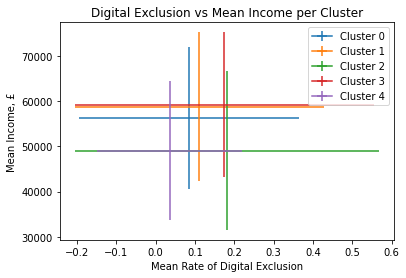

<Figure size 432x288 with 0 Axes>

In [25]:
plt.figure()
for item in descript:
    plt.errorbar(item.loc['mean','Target'],item.loc['mean','Mean Income'],xerr = item.loc['std','Target'],yerr =item.loc['std','Mean Income'] )
plt.legend(['Cluster 0','Cluster 1','Cluster 2','Cluster 3','Cluster 4'])
plt.xlabel('Mean Rate of Digital Exclusion')
plt.ylabel('Mean Income, £')
plt.title('Digital Exclusion vs Mean Income per Cluster')
plt.show()
plt.savefig('Income.png', dpi = 600)

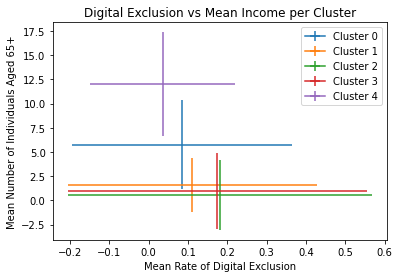

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure()
for item in descript:
    plt.errorbar(item.loc['mean','Target'],item.loc['mean','Population aged 65+'],xerr = item.loc['std','Target'],yerr =item.loc['std','Population aged 65+'] )
plt.legend(['Cluster 0','Cluster 1','Cluster 2','Cluster 3','Cluster 4'])
plt.xlabel('Mean Rate of Digital Exclusion')
plt.ylabel('Mean Number of Individuals Aged 65+')
plt.title('Digital Exclusion vs Mean Income per Cluster')
plt.show()
plt.savefig('Income.png', dpi = 600)